In [18]:
from sklearn.linear_model import LogisticRegression as LR 
from sklearn.datasets import load_breast_cancer 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import SelectFromModel 

In [2]:
data = load_breast_cancer() 
X = data.data 
y = data.target 

In [3]:
data.data.shape 

(569, 30)

## Penalty L1 and L2 

In [4]:
lr1 = LR(penalty = 'l1', solver = 'liblinear', C =0.5, max_iter = 1000).fit(X,y) 
lr2 = LR(penalty = 'l2',solver = 'liblinear',C = 0.5,max_iter = 1000).fit(X,y) 

In [5]:
lr1.coef_ 

array([[ 3.99017904,  0.03144992, -0.13562053, -0.01621181,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50318176,  0.        , -0.07123149,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24533943, -0.12843691, -0.01442329,  0.        ,
         0.        , -2.05206973,  0.        ,  0.        ,  0.        ]])

In [6]:
lr2.coef_ 

array([[ 1.61520498e+00,  1.03165077e-01,  4.89949912e-02,
        -4.54501839e-03, -9.48008442e-02, -3.01421091e-01,
        -4.56859977e-01, -2.23258644e-01, -1.36553775e-01,
        -1.93906452e-02,  1.51863698e-02,  8.84898768e-01,
         1.16165402e-01, -9.44763010e-02, -9.89655843e-03,
        -2.29725881e-02, -5.65958129e-02, -2.71050978e-02,
        -2.78528014e-02,  3.23039398e-04,  1.25588920e+00,
        -3.02228846e-01, -1.72470625e-01, -2.21057469e-02,
        -1.74443731e-01, -8.78235976e-01, -1.16396035e+00,
        -4.29422429e-01, -4.23200446e-01, -8.69294093e-02]])

In [9]:
(lr1.coef_!=0).sum()  

10

### L1 and L2 which is better 

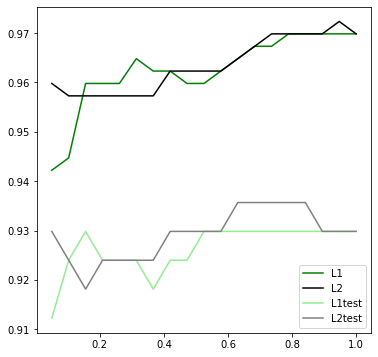

In [17]:
l1 = [] 
l2 = [] 
l1test = [] 
l2test = [] 

Xtrain,Xtest, Ytrain,Ytest = train_test_split(X,y,test_size = 0.3, random_state = 420) 

for i in np.linspace(0.05,1,19): 
    lrl1 = LR(penalty = 'l1',solver = 'liblinear',C = i ,max_iter = 1000).fit(Xtrain,Ytrain) 
    lrl2 = LR(penalty = 'l2',solver = 'liblinear',C = i, max_iter = 1000).fit(Xtrain,Ytrain)  
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain)) 
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest)) 
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain)) 
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest)) 
    
graph = [l1,l2,l1test,l2test] 
color = ['green','black','lightgreen','gray'] 
label = ['L1','L2','L1test','L2test']  

plt.figure(figsize =(6,6)) 
for i in range(len(graph)): 
    plt.plot( np.linspace(0.05,1,19), graph[i],  color[i], label = label[i]) 
plt.legend(loc = 4)  
plt.show() 

## 特征工程 

### Embeded 

In [19]:
data = load_breast_cancer() 
data.data.shape 

(569, 30)

In [20]:
LR_ = LR(solver = 'liblinear',C = 0.9, random_state = 420) 
cross_val_score(LR_,data.data,data.target,cv = 10).mean() 

0.9508145363408522

In [21]:
X_embeded = SelectFromModel(LR_,norm_order = 1).fit_transform(data.data,data.target) 
X_embeded.shape 

(569, 9)

In [24]:
cross_val_score(LR_,X_embeded,data.target,cv = 10).mean() 

0.9368107769423559

(0.0, (569, 30))
(0.10564734410020654, (569, 17))
(0.21129468820041308, (569, 12))
(0.3169420323006196, (569, 11))
(0.42258937640082617, (569, 8))
(0.5282367205010328, (569, 8))
(0.6338840646012392, (569, 6))
(0.7395314087014457, (569, 5))
(0.8451787528016523, (569, 5))
(0.9508260969018589, (569, 5))
(1.0564734410020655, (569, 5))
(1.162120785102272, (569, 4))
(1.2677681292024785, (569, 2))
(1.373415473302685, (569, 2))
(1.4790628174028915, (569, 2))
(1.584710161503098, (569, 1))
(1.6903575056033047, (569, 1))
(1.7960048497035113, (569, 1))
(1.9016521938037179, (569, 1))
(2.0072995379039242, (569, 1))


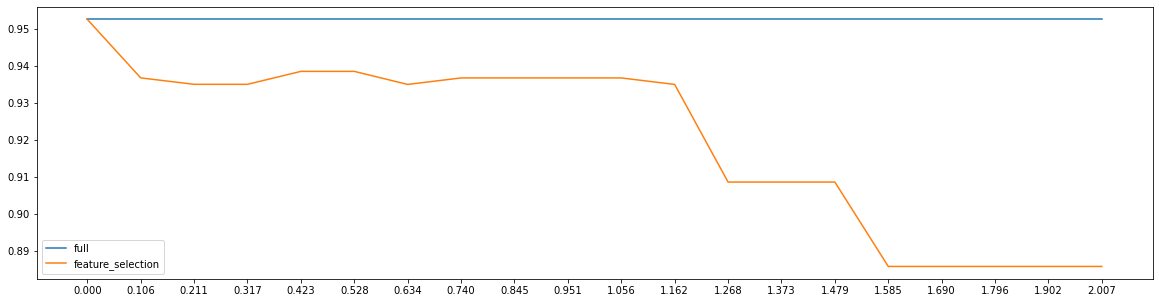

In [31]:
#通过调解threshold 来改善结果 
#一旦调整threshold 就不是在用l1正则化来选择特征 
#而是通过.coef_来选择特征 

score_fullx = [] 
score_x_embedded = [] 

threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20) 

k = 0 

for i in threshold: 
    X_embeded = SelectFromModel(LR_,threshold = i).fit_transform(data.data,data.target) 
    score_fullx.append(cross_val_score(LR_,data.data,data.target,cv = 5).mean()) 
    score_x_embedded.append(cross_val_score(LR_,X_embeded,data.target,cv = 5).mean()) 
    print((threshold[k],X_embeded.shape)) 
    k+=1 
    
plt.figure(figsize = (20,5)) 
plt.plot(threshold,score_fullx,label = 'full') 
plt.plot(threshold,score_x_embedded,label = 'feature_selection')
plt.xticks(threshold) 
plt.legend() 
plt.show() 

    

### 调整C值 

the maximum of score after adjusting C is 0.9561090225563911 and the C value is 7.01


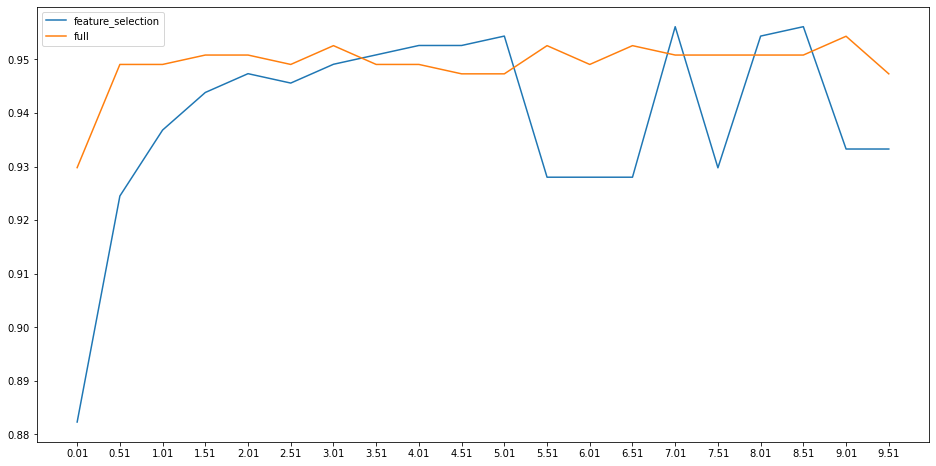

In [35]:
score_fullx = [] 
score_c = [] 

C = np.arange(0.01,10.01,0.5) 

for i in C: 
    LR_ = LR(C = i, solver = 'liblinear', random_state = 420) 
    score_fullx.append(cross_val_score(LR_,data.data,data.target,cv = 10).mean())
    X_embedded = SelectFromModel(LR_,norm_order = 1).fit_transform(data.data,data.target) 
    score_c.append(cross_val_score(LR_,X_embedded,data.target,cv = 10) .mean()) 
    
print('the maximum of score after adjusting C is {} and the C value is {}'.format(max(score_c),C[score_c.index(max(score_c))])) 

plt.figure(figsize = (16,8)) 
plt.plot(C,score_c, label = 'feature_selection') 
plt.plot(C,score_fullx,label = 'full') 
plt.xticks(C) 
plt.legend() 
plt.show() 

#### 细化C值学习曲线 

the maximum of score after adjusting C is 0.9543546365914788 and the C value is 6.8599999999999985


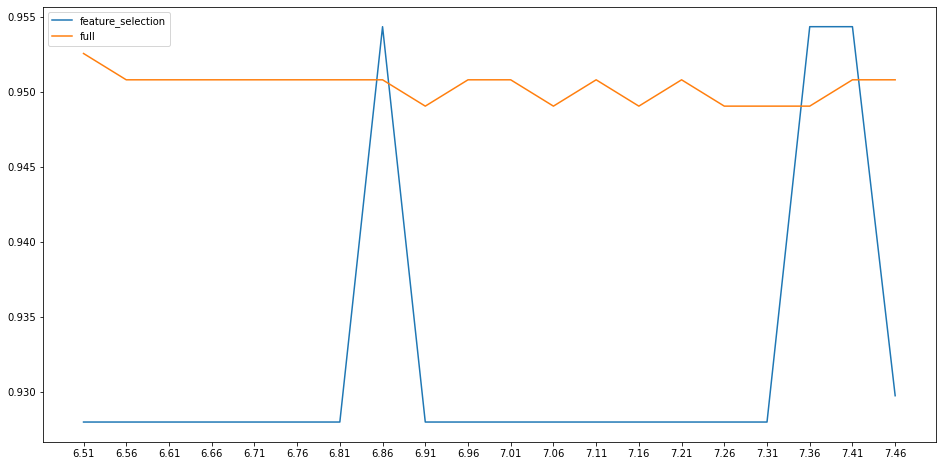

In [37]:
score_fullx = [] 
score_c = [] 

C = np.arange(6.51,7.51,0.05) 

for i in C: 
    LR_ = LR(C = i, solver = 'liblinear', random_state = 420) 
    score_fullx.append(cross_val_score(LR_,data.data,data.target,cv = 10).mean())
    X_embedded = SelectFromModel(LR_,norm_order = 1).fit_transform(data.data,data.target) 
    score_c.append(cross_val_score(LR_,X_embedded,data.target,cv = 10) .mean()) 
    
print('the maximum of score after adjusting C is {} and the C value is {}'.format(max(score_c),C[score_c.index(max(score_c))])) 

plt.figure(figsize = (16,8)) 
plt.plot(C,score_c, label = 'feature_selection') 
plt.plot(C,score_fullx,label = 'full') 
plt.xticks(C) 
plt.legend() 
plt.show() 

### max_iter 学习曲线 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


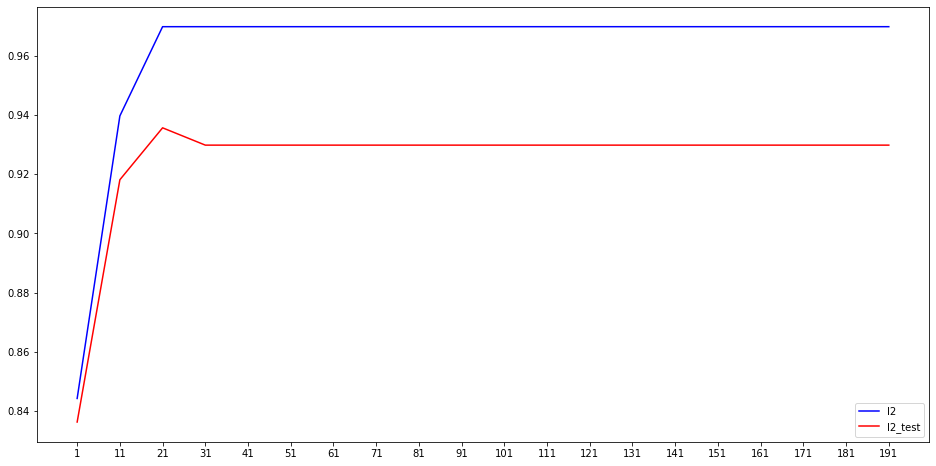

In [40]:
l2 = [] 
l2_test = [] 

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.3,random_state =420) 

for i in np.arange(1,201,10): 
    l2lr = LR(solver = 'liblinear',C = 0.9,penalty = 'l2',max_iter = i).fit(Xtrain,Ytrain) 
    l2.append(accuracy_score(l2lr.predict(Xtrain),Ytrain)) 
    l2_test.append(accuracy_score(l2lr.predict(Xtest),Ytest)) 
    
graph = [l2,l2_test] 
color = ['blue','red'] 
label = ['l2','l2_test'] 

plt.figure(figsize = (16,8)) 
for i in range(len(graph)): 
    plt.plot(np.arange(1,201,10),graph[i],color[i],label = label[i])
plt.legend(loc = 4) 
plt.xticks(np.arange(1,201,10)) 
plt.show() 

## 二元回归与多元回归 

In [42]:
from sklearn.datasets import load_iris
iris = load_iris()
for multi_class in ('multinomial', 'ovr'):
    clf = LR(solver='sag', max_iter=100, random_state=42,
                multi_class=multi_class).fit(iris.data, iris.target)
#打印两种multi_class模式下的训练分数
#%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。
#字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量
print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target),
multi_class))

training score : 0.960 (ovr)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
